Import de todas las librerias necesarias.

Nummpy: Operaciones numéricas eficientes y generación de datos aleatorios

Pandas: Manipulación estructurada de datos

Faker: Generación de datos realistas

Matplotlib: Visualización gráfica de datos

In [222]:
import numpy as np
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt

Inicializamos el generador de datos "Faker" para generar datos realistas como los nombres. Mediante "es_ES" generamos datos en castellano, por defecto los crearía en inglés.

In [223]:
fake = Faker('es_ES')

Configuramos las probabilidades para crear las notas. Suponemos que sacar entre 5 y 7 es lo más habitual, por eso lo establecemos a 0.5 y el otro 0.5 de probabilidad para el resto de notas.


In [224]:
prob_5_7 = 0.5  
prob_resto = 1 - prob_5_7 

Generamos las 1000 notas gracias a la librería numpy y su función random. Estas se encontrarán entre 1 y 10.

In [225]:
notas = np.where(
    np.random.rand(1000) < prob_5_7,  
    np.clip(np.random.normal(loc=6, scale=1, size=1000), 5, 7),  
    np.random.randint(1, 11, size=1000) 
)

Configuramos las probabilidades para sacar el numero de horas que se estudia diariamente. Suponemos que estudiar entre 3 y 5 es lo más habitual, por eso lo establecemos a 0.5 y el otro 0.5 de probabilidad para el resto de notas.


In [226]:
prob_3_5 = 0.5  
prob_resto = 1 - prob_3_5 

In [227]:
u_horas = np.random.rand(1000)
horas_estudio = np.where(
    u_horas < prob_3_5,
    np.clip(np.random.normal(loc=4, scale=2, size=1000), 3, 5),
    np.random.uniform(0, 9, size=1000)
)


Creamos un diccionario de datos estructurado que luego se convertirá en un DataFrame de pandas.
Generamos una lista de 1000 nombres completos aleatorios en español usando Faker, asignamos aleatoriamente una de las 3 asignaturas a cada estudiante y finalmente Asignamos las notas generadas previamente (array NumPy) y las convertimos a enteros.



In [228]:
data = {
    'DNI': np.random.randint(1000, 9999, size=1000),
    'Nombre': [f"{fake.first_name()} {fake.last_name()}" for _ in range(1000)],
    'Asignatura': np.random.choice(['Matematicas', 'Fisica', 'Programacion'], 1000),
    'Nota': notas.astype(int),
    'horas_estudio': horas_estudio,
    'Edad': np.random.randint(18, 26, size=1000),
    'Sexo': np.random.choice(['Masculino', 'Femenino'], size=1000),
    'Ciudad': [fake.city() for _ in range(1000)],
    'Correo': [fake.email() for _ in range(1000)],
    'Telefono': [fake.phone_number() for _ in range(1000)]
}

In [229]:
missing_rate = 0.05  # 5% de valores nulos por columna
for col in ['Edad', 'Sexo', 'Ciudad', 'Correo', 'Telefono']:
    mask = np.random.rand(len(data['DNI'])) < missing_rate
    # Para columnas numéricas (Edad) usar np.nan, para las demás, None
    if col == 'Edad':
        series = pd.Series(data[col], dtype=float)
        data[col] = series.where(~mask, np.nan)
    else:
        series = pd.Series(data[col])
        data[col] = series.where(~mask, None)

Convertimos el diccionario data en una tabla estructurada (DataFrame) de pandas con columnas "Nombre", "Asignatura" y "Nota" y lo guardamos en csv (alumnos_deusto).

Añadimos encoding='utf-8-sig' para que solamente se utilicen los caracteres estandar, ya que sin ello, Faker genera nombres con tildes, por lo que en el csv aparecen mal.

Ejemplo: En vez de Menéndez, aparece MenÃ©ndez

In [230]:
df = pd.DataFrame(data)
df.to_csv('alumnos_deusto.csv', index=False, encoding='utf-8-sig')

In [231]:
df.head()

,DNI,Nombre,Asignatura,Nota,horas_estudio,Edad,Sexo,Ciudad,Correo,Telefono
0,1940,Filomena Martin,Fisica,8,6.311275,19.0,Masculino,Ávila,amador45@example.org,+34979 48 26 91
1,6945,Felisa Folch,Matematicas,6,8.391346,20.0,Femenino,Madrid,bernardino20@example.net,+34 807 48 54 01
2,5317,Manuel Hervia,Fisica,9,3.000000,20.0,Femenino,Ávila,pugamiguel-angel@example.com,+34800 604 878
3,5142,Jose Carlos Lorenzo,Fisica,6,3.153718,20.0,Femenino,Jaén,siniesta@example.net,+34976 45 97 40
4,9889,Albina Robledo,Matematicas,7,0.130744,22.0,Femenino,Ceuta,mateomoles@example.org,+34847 086 853


In [232]:
df.isnull().sum()

DNI               0
Nombre            0
Asignatura        0
Nota              0
horas_estudio     0
Edad             40
Sexo             48
Ciudad           55
Correo           42
Telefono         66
dtype: int64

Creamos un histograma con las notas del DataFrame, dividiéndolas en 10 intervalos (bins) y añadiendo bordes negros (edgecolor).
Le añadimos título al gráfico ("Distribución de Notas") y etiquetas a los ejes (X: "Nota", Y: "Frecuencia") y mostramos el histograma.

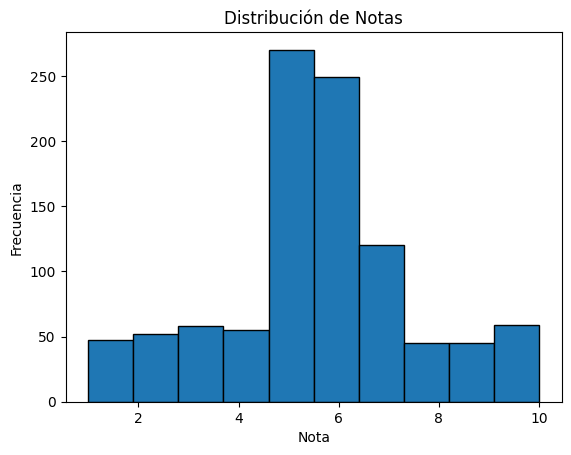

In [233]:
plt.hist(df['Nota'], bins=10, edgecolor='black')
plt.title('Distribución de Notas')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.show()

Como podemos ver, la mayoría de notas, efectivamente se sitúan entre el 5 y el 7, creando una distribución normal.

Creamos un histograma con las horas de estudio del DataFrame, dividiéndolas en 10 intervalos (bins) y añadiendo bordes negros (edgecolor).
Le añadimos título al gráfico ("Distribución de horas") y etiquetas a los ejes (X: "horas_estudio", Y: "Frecuencia") y mostramos el histograma.

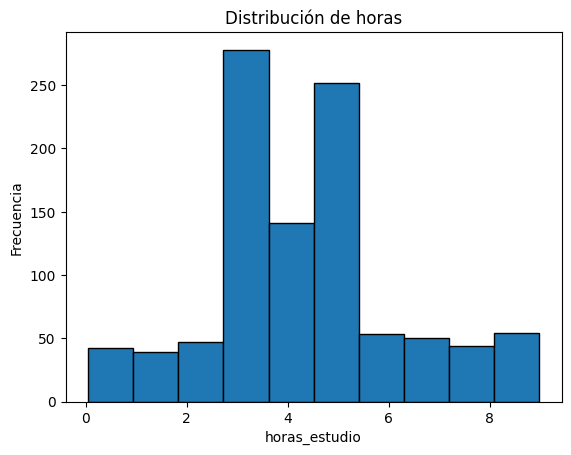

In [234]:
plt.hist(df['horas_estudio'], bins=10, edgecolor='black')
plt.title('Distribución de horas')
plt.xlabel('horas_estudio')
plt.ylabel('Frecuencia')
plt.show()

Como podemos ver, la mayoría de horas, efectivamente se sitúan entre el 3 y el 5, creando una distribución normal.

Cargamos el csv original para dividirlo en 2 archivos (alumnos  notas)

In [235]:
df = pd.read_csv('alumnos_deusto.csv', encoding='utf-8-sig')

Archivo de alumnos (sin notas)

In [236]:
df[['Nombre']].to_csv('alumnos.csv', index=False)


Archivo de notas (asignatura + nota)

In [237]:
df[['Asignatura', 'Nota']].to_csv('notas.csv', index=False)


## Limpieza

### Duplicados
Verificamos que no haya. En caso de haber borramos la segunda aparición y lo guardamos en otro csv.

In [238]:
duplicados = df[df["DNI"].duplicated()]

In [239]:
if not duplicados.empty:
    print("Hay DNIs duplicados:")
    print(duplicados)
else:
    print("No hay DNIs duplicados.")

Hay DNIs duplicados:
      DNI            Nombre    Asignatura  Nota  horas_estudio  Edad  \
120  9155     Nidia Pedraza  Programacion     7       5.000000  23.0   
186  8389      Lara Alberto        Fisica     1       5.000000  23.0   
190  1645   Begoña Ferrando  Programacion     3       4.856674  18.0   
198  5844      Iván Morales        Fisica     7       5.000000  25.0   
220  7027      Carmina Rico        Fisica    10       6.769775  23.0   
..    ...               ...           ...   ...            ...   ...   
972  7609  Sandalio Marqués   Matematicas     5       8.565598  25.0   
980  7692   Epifanio Tejera   Matematicas     5       4.294853  19.0   
981  8131      Glauco Salom        Fisica     4       3.976240  18.0   
982  5991   Amarilis Coloma  Programacion     6       3.000000  23.0   
995  3016      Alejo Martín   Matematicas     7       8.876608  25.0   

          Sexo     Ciudad                        Correo          Telefono  
120   Femenino    Badajoz  valeriamont

In [240]:
print("Tamaño antes de borrar duplicados: ", df.shape)

print("Numero de duplicados antes de eliminarlos: ", df.duplicated(subset='DNI', keep='first').sum())

df_sin_duplicados = df.drop_duplicates(subset='DNI', keep='first')
df_sin_duplicados.to_csv("alumnos_deusto_sin_duplicados.csv", index=False)

print("Numero de duplicados despues de eliminarlos: ",df_sin_duplicados.duplicated(subset='DNI', keep='first').sum())

print("Tamaño despues de borrar duplicados: ", df_sin_duplicados.shape)


Tamaño antes de borrar duplicados:  (1000, 10)
Numero de duplicados antes de eliminarlos:  62
Numero de duplicados despues de eliminarlos:  0
Tamaño despues de borrar duplicados:  (938, 10)


### Nulos
Verificamos que no haya. En caso de haber borramos la linea con valores nulos y lo guardamos en otro csv.

In [241]:
df = pd.read_csv('alumnos_deusto_sin_duplicados.csv', encoding='utf-8-sig')

print("Tamaño original: ", df.shape)

print("Valores nulos por columna:")
print(df.isnull().sum(), "\n")

df_sin_nulos = df.dropna()
print("Tamaño tras dropna:", df_sin_nulos.shape)

print("\n Valores nulos por columna tras el dropna:")
print(df_sin_nulos.isnull().sum(), "\n")

df_sin_nulos.to_csv("alumnos_deusto_sin_nulos.csv", index=False)

Tamaño original:  (938, 10)
Valores nulos por columna:
DNI               0
Nombre            0
Asignatura        0
Nota              0
horas_estudio     0
Edad             38
Sexo             44
Ciudad           50
Correo           37
Telefono         64
dtype: int64 

Tamaño tras dropna: (733, 10)

 Valores nulos por columna tras el dropna:
DNI              0
Nombre           0
Asignatura       0
Nota             0
horas_estudio    0
Edad             0
Sexo             0
Ciudad           0
Correo           0
Telefono         0
dtype: int64 



## Resumen de las estadisticas

In [242]:
import pandas as pd

# Cargar el DataFrame
df = pd.read_csv('alumnos_deusto_sin_nulos.csv', encoding='utf-8-sig')

# Columnas a analizar
cols = ['Nota', 'horas_estudio', 'Edad']

# Función para imprimir estadísticas de una serie numérica
def resumen_columna(serie: pd.Series):
    nombre = serie.name
    print(f"----- {nombre} -----")
    print(f"Mediana:               {serie.median()}")
    print(f"Mínimo:                {serie.min()}")
    print(f"Máximo:                {serie.max()}")
    print(f"Media:                 {serie.mean():.2f}")
    print(f"Desviación estándar:   {serie.std():.2f}")
    print(f"Varianza:              {serie.var():.2f}")
    print(f"Rango (max - min):     {serie.max() - serie.min()}\n")

# Estadísticas descriptivas generales
print(df[cols].describe().T, "\n")  # .T para ver cada columna en fila

# Estadísticas detalladas por columna
for col in cols:
    resumen_columna(df[col])


               count       mean       std       min   25%        50%   75%  \
Nota           733.0   5.592087  2.087248   1.00000   5.0   6.000000   7.0   
horas_estudio  733.0   4.326218  1.905670   0.04956   3.0   4.164781   5.0   
Edad           733.0  21.507503  2.316255  18.00000  20.0  21.000000  23.0   

                     max  
Nota           10.000000  
horas_estudio   8.976049  
Edad           25.000000   

----- Nota -----
Mediana:               6.0
Mínimo:                1
Máximo:                10
Media:                 5.59
Desviación estándar:   2.09
Varianza:              4.36
Rango (max - min):     9

----- horas_estudio -----
Mediana:               4.1647810761499935
Mínimo:                0.0495596789761954
Máximo:                8.976048905104978
Media:                 4.33
Desviación estándar:   1.91
Varianza:              3.63
Rango (max - min):     8.926489226128783

----- Edad -----
Mediana:               21.0
Mínimo:                18.0
Máximo:               

Aqui se pueden ver de forma ordenala, los minimos, maximos, mediana, media, desviación, varianza y rango de los valores numericos nota, edad y horas de estudio

## Visualización

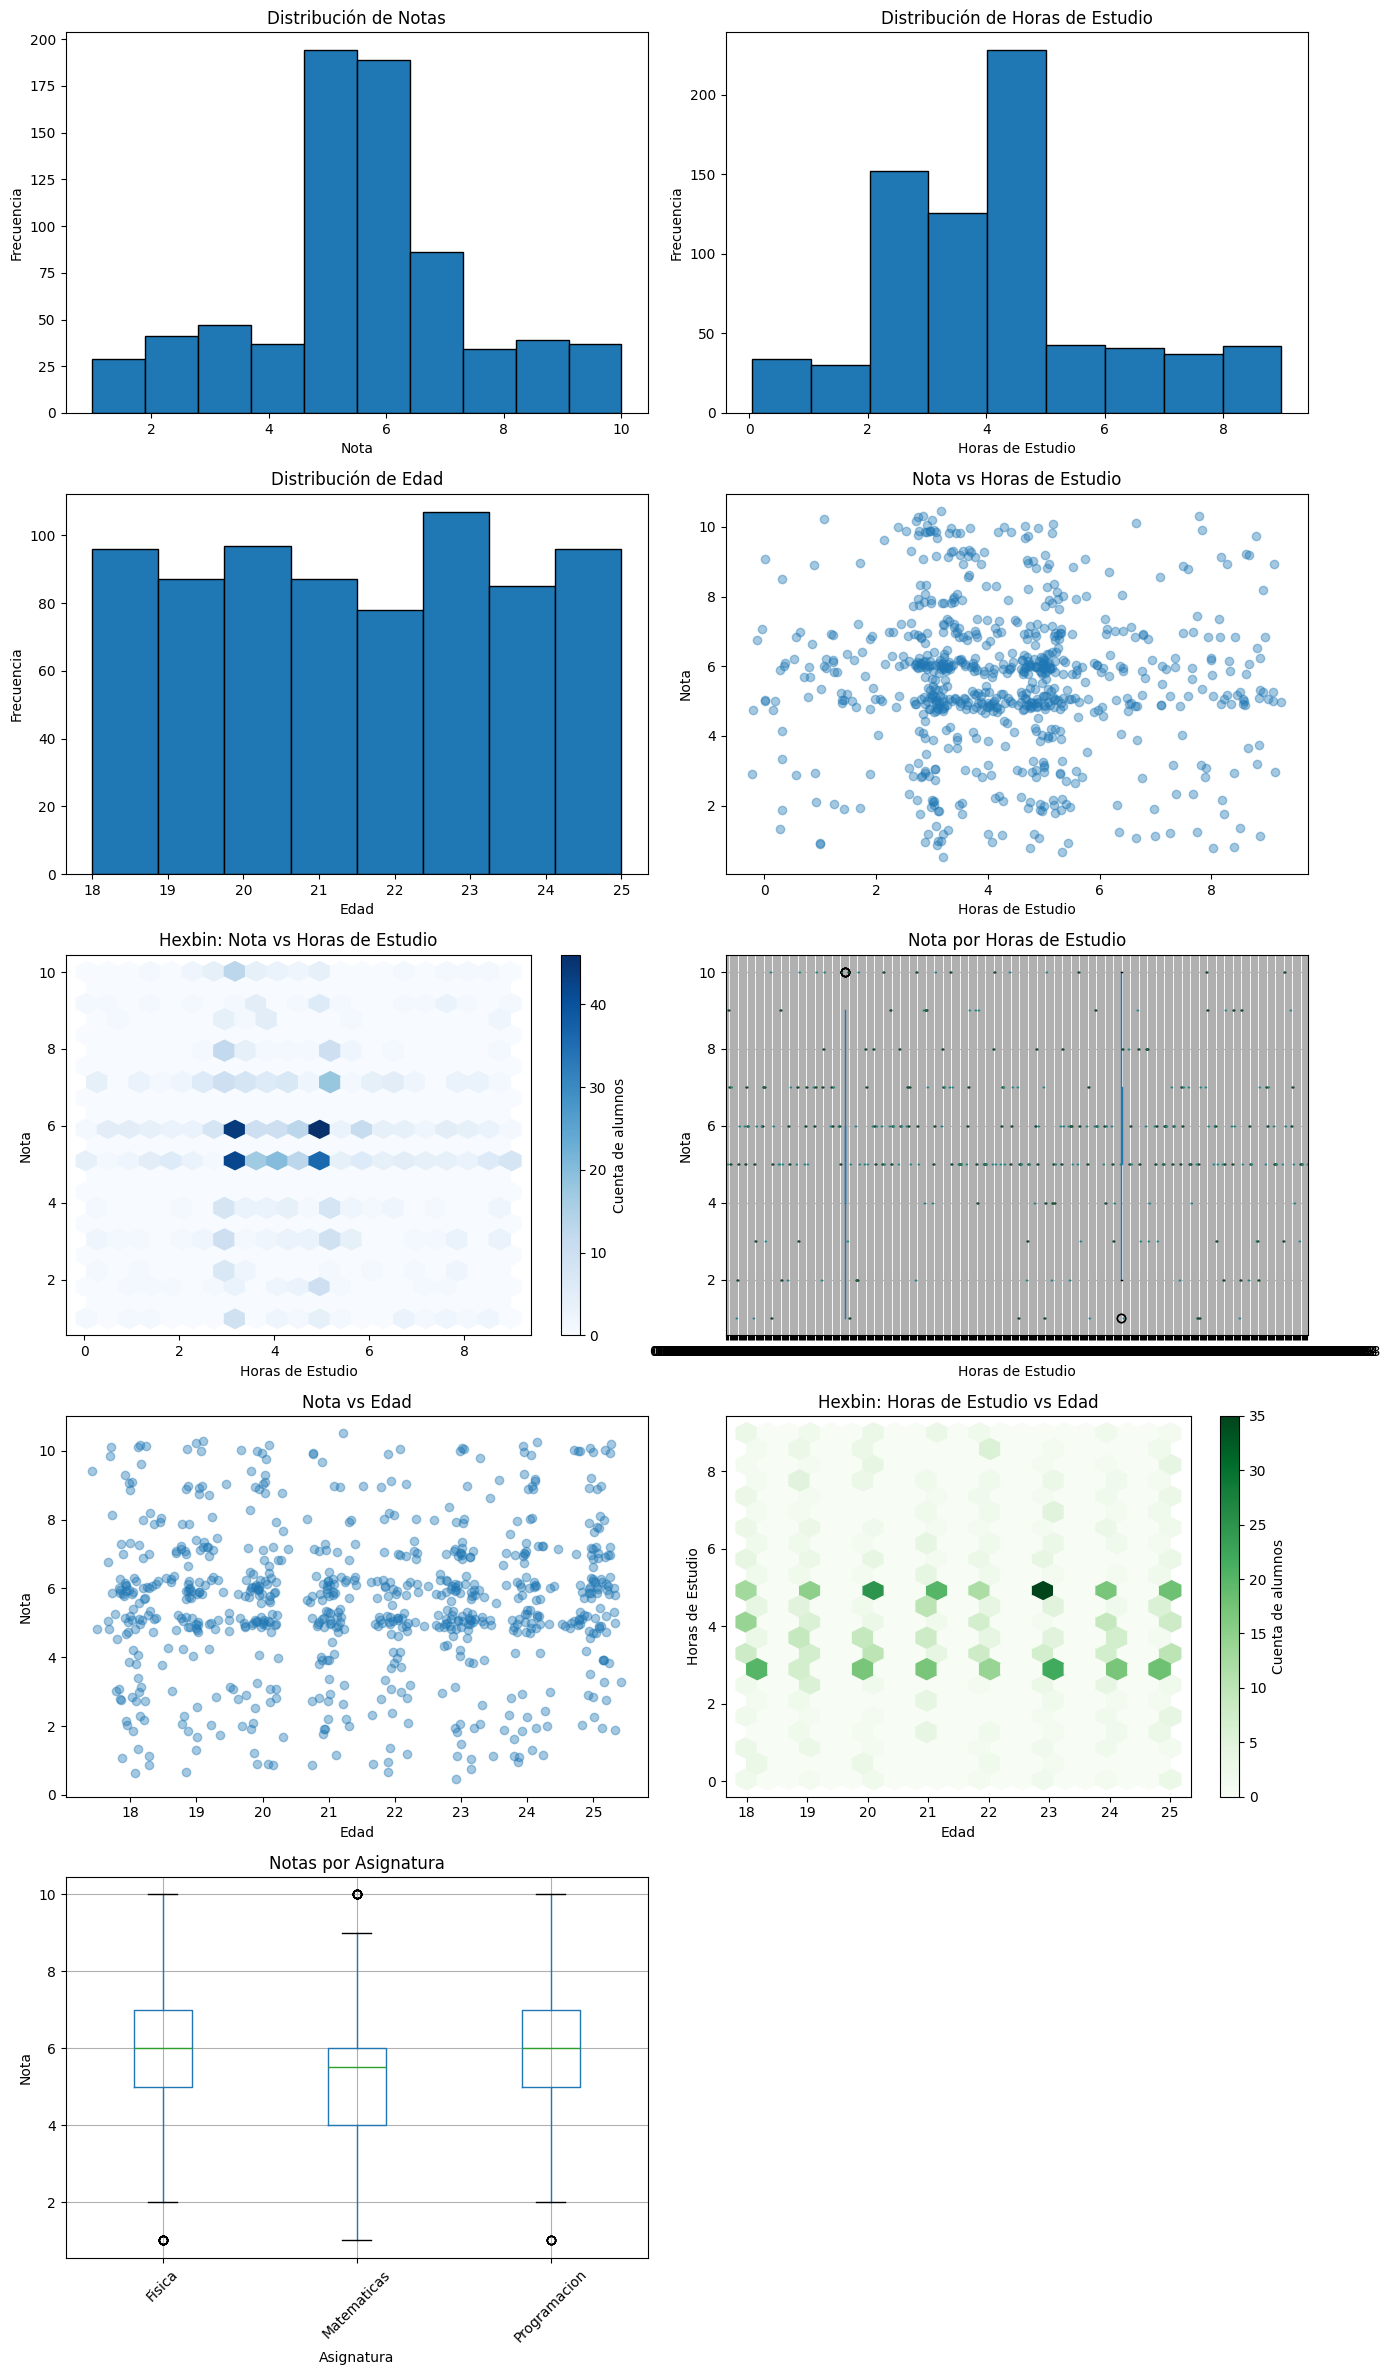

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('alumnos_deusto_sin_nulos.csv', encoding='utf-8-sig')

jitter_scale = 0.2
alpha = 0.4

# Creamos 5 filas x 2 columnas = 10 ejes, y ajustamos tamaño
fig, axes = plt.subplots(5, 2, figsize=(14, 24))
axes = axes.flatten()

# 1: Histograma de Nota
axes[0].hist(df['Nota'], bins=10, edgecolor='black')
axes[0].set_title('Distribución de Notas')
axes[0].set_xlabel('Nota')
axes[0].set_ylabel('Frecuencia')

# 2: Histograma de Horas de Estudio
axes[1].hist(df['horas_estudio'], bins=9, edgecolor='black')
axes[1].set_title('Distribución de Horas de Estudio')
axes[1].set_xlabel('Horas de Estudio')
axes[1].set_ylabel('Frecuencia')

# 3: Histograma de Edad
axes[2].hist(df['Edad'].dropna(), bins=8, edgecolor='black')
axes[2].set_title('Distribución de Edad')
axes[2].set_xlabel('Edad')
axes[2].set_ylabel('Frecuencia')

# 4: Scatter Nota vs Horas (jitter)
x1 = df['horas_estudio'] + np.random.normal(0, jitter_scale, size=len(df))
y1 = df['Nota']          + np.random.normal(0, jitter_scale, size=len(df))
axes[3].scatter(x1, y1, alpha=alpha)
axes[3].set_title('Nota vs Horas de Estudio')
axes[3].set_xlabel('Horas de Estudio')
axes[3].set_ylabel('Nota')

# 5: Hexbin Nota vs Horas
hb1 = axes[4].hexbin(df['horas_estudio'], df['Nota'], gridsize=20, cmap='Blues')
fig.colorbar(hb1, ax=axes[4], label='Cuenta de alumnos')
axes[4].set_title('Hexbin: Nota vs Horas de Estudio')
axes[4].set_xlabel('Horas de Estudio')
axes[4].set_ylabel('Nota')

# 6: Boxplot Nota por Horas
df.boxplot(column='Nota', by='horas_estudio', ax=axes[5], rot=0)
axes[5].set_title('Nota por Horas de Estudio')
axes[5].set_xlabel('Horas de Estudio')
axes[5].set_ylabel('Nota')
axes[5].figure.suptitle('')

# 7: Scatter Nota vs Edad (jitter)
x2 = df['Edad'].fillna(df['Edad'].mean()) + np.random.normal(0, jitter_scale, size=len(df))
y2 = df['Nota'] + np.random.normal(0, jitter_scale, size=len(df))
axes[6].scatter(x2, y2, alpha=alpha)
axes[6].set_title('Nota vs Edad')
axes[6].set_xlabel('Edad')
axes[6].set_ylabel('Nota')

# 8: Hexbin Horas vs Edad
hb2 = axes[7].hexbin(df['Edad'], df['horas_estudio'], gridsize=20, cmap='Greens')
fig.colorbar(hb2, ax=axes[7], label='Cuenta de alumnos')
axes[7].set_title('Hexbin: Horas de Estudio vs Edad')
axes[7].set_xlabel('Edad')
axes[7].set_ylabel('Horas de Estudio')

# 9: Boxplot Notas por Asignatura
df.boxplot(column='Nota', by='Asignatura', ax=axes[8], rot=45)
axes[8].set_title('Notas por Asignatura')
axes[8].set_xlabel('Asignatura')
axes[8].set_ylabel('Nota')
axes[8].figure.suptitle('')

# 10: eje sobrante, lo ocultamos
axes[9].axis('off')

# Ajuste y muestra
plt.tight_layout()
plt.show()
